In [40]:
#import library yang dibutuhkan
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [41]:
#import data 
df = pd.read_csv('Stores.csv')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


Text(0, 0.5, 'Store_Sales')

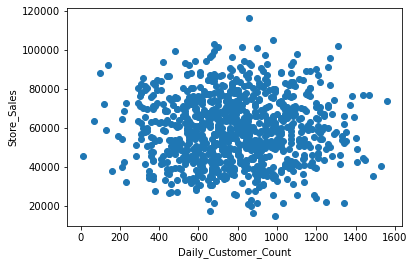

In [42]:
#visualisasi persebaran data
plt.scatter(df['Daily_Customer_Count'], df['Store_Sales'])
plt.xlabel('Daily_Customer_Count')
plt.ylabel('Store_Sales')

In [43]:
#ambil kolom yang diperlukan untuk dianalisis
df_c=df[['Daily_Customer_Count', 'Store_Sales']]
df_c

,Daily_Customer_Count,Store_Sales
0,530,66490
1,210,39820
2,720,54010
3,620,53730
4,450,46620
...,...,...
891,1080,66390
892,850,82080
893,1060,76440
894,770,96610


In [44]:
#Data Scaling
scaler = StandardScaler()
scaler.fit(df_c)
df_scaled = scaler.transform(df_c)
df_scaled

array([[-0.9664807 ,  0.41549581],
       [-2.17293004, -1.13678713],
       [-0.25015141, -0.31088181],
       ...,
       [ 1.03170101,  0.99461899],
       [-0.0616437 ,  2.16858025],
       [ 1.22020871, -0.29167471]])

In [45]:
#data frame
df_scaled = pd.DataFrame(df_scaled, columns=['Daily_Customer_Count','Store_Sales'])
df_scaled

,Daily_Customer_Count,Store_Sales
0,-0.966481,0.415496
1,-2.172930,-1.136787
2,-0.250151,-0.310882
3,-0.627167,-0.327179
4,-1.268093,-0.741004
...,...,...
891,1.107104,0.409675
892,0.239969,1.322886
893,1.031701,0.994619
894,-0.061644,2.168580


In [46]:
#tentukan jumlah cluster
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [47]:
#lakukan clustering
y_predicted = km.fit_predict(df_scaled[['Daily_Customer_Count','Store_Sales']])
y_predicted

array([0, 3, 3, 3, 3, 3, 1, 2, 3, 2, 1, 3, 2, 2, 0, 1, 1, 3, 1, 2, 3, 0,
       2, 3, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 3, 3, 1, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 3, 1, 1, 1, 3, 0, 3, 3, 1, 3, 1,
       3, 0, 3, 3, 2, 3, 0, 0, 0, 0, 3, 1, 2, 0, 3, 1, 3, 2, 1, 3, 1, 2,
       2, 3, 1, 0, 3, 3, 1, 3, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 3, 2,
       2, 0, 2, 2, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 3, 0, 0, 3, 1, 0, 2, 0,
       2, 2, 2, 3, 2, 1, 0, 1, 2, 0, 3, 3, 0, 2, 0, 3, 2, 2, 3, 0, 0, 3,
       3, 0, 1, 3, 2, 2, 3, 3, 0, 0, 3, 3, 0, 3, 2, 0, 2, 1, 3, 3, 3, 3,
       0, 0, 3, 2, 1, 2, 1, 1, 0, 3, 2, 2, 0, 3, 1, 1, 1, 0, 3, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 2, 3, 0, 2, 3, 3, 1, 0, 0, 0, 3, 1, 2, 1, 0,
       0, 3, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 3, 2, 1, 1, 3, 1, 3, 1, 1, 3,
       0, 0, 1, 2, 1, 1, 3, 3, 3, 0, 3, 2, 3, 0, 1, 0, 0, 3, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 3, 3, 3, 2, 0, 1, 2, 2, 2, 1, 3, 0, 3, 2, 2, 1, 2,
       3, 3, 2, 3, 3, 1, 3, 3, 2, 0, 3, 3, 0, 3, 0,

In [48]:
#memasukkan hasil clustering yang berupa one-dimensional array ke dataframe di kolom ‘Sales_type’
df_c['Sales_type'] = y_predicted
df_c

,Daily_Customer_Count,Store_Sales,Sales_type
0,530,66490,0
1,210,39820,3
2,720,54010,3
3,620,53730,3
4,450,46620,3
...,...,...,...
891,1080,66390,1
892,850,82080,1
893,1060,76440,1
894,770,96610,1


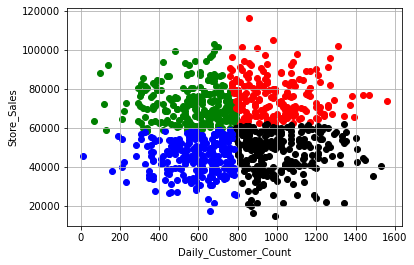

In [51]:
#visualisasi hasil clustering
df1 = df_c[df_c.Sales_type==0]
df2 = df_c[df_c.Sales_type==1]
df3 = df_c[df_c.Sales_type==2]
df4 = df_c[df_c.Sales_type==3]

plt.scatter(df1.Daily_Customer_Count,df1['Store_Sales'],color='green')
plt.scatter(df2.Daily_Customer_Count,df2['Store_Sales'],color='red')
plt.scatter(df3.Daily_Customer_Count,df3['Store_Sales'],color='black')
plt.scatter(df4.Daily_Customer_Count,df4['Store_Sales'],color='blue')

plt.xlabel('Daily_Customer_Count')
plt.ylabel('Store_Sales')
plt.grid()